<a href="https://colab.research.google.com/github/pedrojfsantos/dotfiles/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning week - Day 3 - Exercise 3: Transfer Learning

The exercise one made you build your first Convolutional Neural Network.
In the second exercise, you implemented first data augmentation techniques to improve the accuracy of your model. 
But you've probably seen that when building complex convolutional neural networks and using a lot of data, the training started to take some time. 


# Google Colab


To overcome this long training time, you can train your neural networks (especially convolutional neural networks) on Google Colab. Google Colab is nothing more than a way to have online notebooks, with the possibility to use Google GPUs. The idea here is not to use it in production (as there are some limitations) but to use Google Colab to test and prototype new algorithms. This free access to GPU allows you to accelerate the computational time. 

So the first task is to open the notebook you are reading on Google Colab. To do so: 
- Open Google Colab [here](https://colab.research.google.com/)
- Import a Notebook and select this file, the one you are currently reading.
- Once open, you a running a similar Notebook but in Google Colab.
- Change the runtime type to GPU - default is CPU.

Welcome to Google Colab! Do not forget that you can open any notebook in Google Colab (but it is not always worth it and working on your computer might be enough for many tasks - however, with images, we recommand to do it on Google Colab. Moreover, we will mention the exercises that are preferably done on Colab during the week.).


# The exercise


This notebook is dedicated to **transfer learning** which corresponds to using an existing model that has been already trained on a particular task, and fine-tuning it for a different task.

To that end, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks. 

The idea is that first layers are not specialized for the particular task it has been trained on ; only the last one are. Therefore, we will load the existing VGG16 network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.


# Data loading & Preprocessing

You have two options to load the data on Google Colab.


### Option 1: Loading the data directly 

You can first get the data onto google Colab thanks to:

`!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`,

and then run 

`!unzip flowers-dataset.zip`

This is a very easy option to load the data into your working directory.


### Option2: Adding the data to Google Drive.

You can first download the data  from `https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`. Then you have to add them to your Google Drive in a folder called `Deep_learning_data` (for instance) and run the following code in the notebook.: 

```
from google.colab import drive
drive.mount('/content/drive/')
```

The previous code will ask you to go to a given webpage where you copy the link and past it in the Colab form that will appear. Do so to load the data on Google Colab.

Why choosing this option over the first one? This can be of interest if you work in a project team, and update the data from time to time. By doing this, you can share the same data folder within a team, and be sure that everyone has the same at any time, even though someone changes it. The drawback is that Google Collab has now access to your Google Folder, which you might not be in favor of, depending on your sensibility.

❓ **Question** ❓ Use one of the above method to load your data. 

In [1]:

!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip

--2020-11-04 15:56:23--  https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
Resolving wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)... 52.218.89.74
Connecting to wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)|52.218.89.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104983809 (100M) [application/zip]
Saving to: ‘flowers-dataset.zip’

flowers-dataset.zip 100%[===================>] 100.12M  21.8MB/s    in 5.5s    

2020-11-04 15:56:29 (18.1 MB/s) - ‘flowers-dataset.zip’ saved [104983809/104983809]



In [2]:
!unzip flowers-dataset.zip

Archive:  flowers-dataset.zip
  inflating: flowers/daisy/2607132536_d95198e619_n.jpg  
  inflating: flowers/daisy/6480809771_b1e14c5cc2_m.jpg  
  inflating: flowers/daisy/9350942387_5b1d043c26_n.jpg  
  inflating: flowers/daisy/4065883015_4bb6010cb7_n.jpg  
  inflating: flowers/daisy/7924174040_444d5bbb8a.jpg  
  inflating: flowers/daisy/8740807508_0587f5b7b7.jpg  
  inflating: flowers/daisy/7629784968_b953501902_n.jpg  
  inflating: flowers/daisy/176375506_201859bb92_m.jpg  
  inflating: flowers/daisy/2509545845_99e79cb8a2_n.jpg  
  inflating: flowers/daisy/3661613900_b15ca1d35d_m.jpg  
  inflating: flowers/daisy/2666572212_2caca8de9f_n.jpg  
  inflating: flowers/daisy/34532930772_5cc5fc600d_n.jpg  
  inflating: flowers/daisy/3098641292_76c908ba1f_n.jpg  
  inflating: flowers/daisy/5679288570_b4c52e76d5.jpg  
  inflating: flowers/daisy/5684911529_88a7ae32ba_n.jpg  
  inflating: flowers/daisy/4538877108_3c793f7987_m.jpg  
  inflating: flowers/daisy/19865728236_a62f8f445b_n.jpg  
  infl

# YOUR CODE HERE

❓ **Question** ❓ Depending on the `loading_method` you have used, load the data and store them in the appropriate variables.

from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data():
    data_path = '/content/drive/My Drive/06-Deep-Learning/02/data/flowers'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes


# YOUR CODE HERE

In [10]:
from tqdm import tqdm
import numpy as np
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical

def load_flowers_data():
    data_path = 'flowers'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes



First things first, let's start by some preprocessing

❓ **Question** ❓ First check that all your images have the same size. How many colors do these images have?

In [11]:
# YOUR CODE HERE
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data()



100%|██████████| 299/299 [00:01<00:00, 245.46it/s]


In [14]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(571, 256, 256, 3) (571, 3) (179, 256, 256, 3) (179, 3) (149, 256, 256, 3) (149, 3)


In [19]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

0    1    2  
0.0  0.0  1.0    197
1.0  0.0  0.0    188
0.0  1.0  0.0    186
dtype: int64

In [20]:
num_classes

3

❓ **Question** ❓ Plot some images with the `imshow` function of matplotlib.

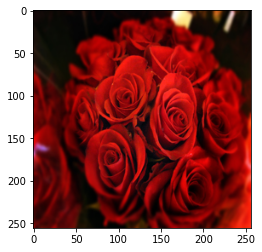

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR PLOT HERE
plt.imshow(X_train[10])

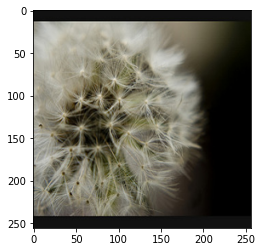

In [24]:
plt.imshow(X_train[100])

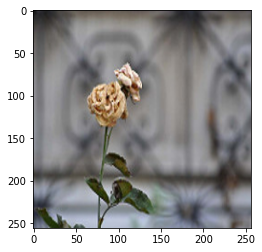

In [27]:
plt.imshow(X_train[300])

# Baseline model


❓ **Question** ❓ As it is already the third exercise, let's make you work a bit on your own to create your own CNN. Here, you are free to write any CNN architecture that is trainable on the flower data. Do not forget to compile it and fit it on the train data (use the `validation_data` with the `X_val` and `y_val` instead of using the `validation_split` argument). Do not forget the early stopping criterion.

<details>
   <summary>(If you really do not know where to start from, you can build the following model:</summary>
    <ul>
        <li> A convolution layer with enough filters - choose the kernel size wisely as your data are quite large here</li>
        <li> A Maxpooling layer </li>
        <li> A second convolution layer </li>
        <li> A Maxpooling layer </li>
        <li> A third convolution layer </li>
        <li> A Maxpooling layer </li>
        <li> Flatten your output </li>
        <li> Add a dense layer </li>
        <li> Add the last layer </li>
        
</ul>
</details>



As you already know how to build CNN, you are here welcome to write your own model, compile it and fit it on the train data (use the 

In [28]:
X_train.shape

(571, 256, 256, 3)

In [38]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
### First convolution & max-pooling
model.add(layers.Conv2D(16, (32,32), strides = (2,2), input_shape=(256, 256, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (16,16), strides = (2,2), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (4,4), strides = (2,2), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

### Flattening
model.add(layers.Flatten())

### One fully connected
model.add(layers.Dense(100, activation='relu'))

### Last layer (let's say a classification with 10 output)
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 16)      49168     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        131104    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)             

❓ **Question** ❓ Play a bit with your model to look at the effect of different architectures, especially by:
- changing the number of convolution layers (associated to their maxpooling layer)
- changing the number of filters
- changing the kernel sizes
- changing the padding and strides

In [ ]:
# YOUR CODE HERE

In [39]:
from tensorflow.keras import optimizers

adam_opt = optimizers.Adam(learning_rate = 0.005)

model.compile(loss='categorical_crossentropy',
              optimizer=adam_opt,
              metrics=['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True, min_delta=1e-2)

history = model.fit(X_train, y_train,
                    validation_split = 0.3,
                    epochs=10, 
                    batch_size=32, 
                    verbose=1,
                    callbacks = es)

Epoch 1/10
13/13 [==============================] - 5s 387ms/step - loss: 1018.5587 - accuracy: 0.3409 - val_loss: 1.0975 - val_accuracy: 0.3198
Epoch 2/10
13/13 [==============================] - 1s 91ms/step - loss: 1.1181 - accuracy: 0.3509 - val_loss: 1.1063 - val_accuracy: 0.3256
Epoch 3/10
13/13 [==============================] - 1s 90ms/step - loss: 1.0917 - accuracy: 0.3584 - val_loss: 1.0987 - val_accuracy: 0.3256
Epoch 4/10
13/13 [==============================] - 1s 90ms/step - loss: 1.0893 - accuracy: 0.3634 - val_loss: 1.0982 - val_accuracy: 0.3256
Epoch 5/10
13/13 [==============================] - 1s 91ms/step - loss: 1.0902 - accuracy: 0.3659 - val_loss: 1.0963 - val_accuracy: 0.3198
Epoch 6/10
13/13 [==============================] - 1s 92ms/step - loss: 1.0880 - accuracy: 0.3634 - val_loss: 1.0969 - val_accuracy: 0.3256


# Transfer learning: VGG16 model

Let's now build our model. 

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

❗ **Remark** ❗ Do not change the default value of the other arguments

In [42]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    
    # YOUR CODE HERE
    model = VGG16(
                  include_top=False, weights='imagenet', input_shape=(256, 256, 3),
                  pooling=(2,2), classes=3, classifier_activation='softmax'
                  )
    
    return model

❓ **Question** ❓ Look at the architecture of the model thanks to the summary method

In [43]:
# YOUR CODE HERE
VGG16_model = load_model()
VGG16_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

Impressive, right? Two things to notice:
- It ends with a convolution layer (namely a maxpooling layer that is the layer that follows a convolution). The flattening of the output and the fully connected layers are not here yet! We will add them
- There are more than 14.000.000 parameters, which is a lot. We could fine-tune them, meaning still updates them in the model algorithm, but it will take a lot of time, therefore we will fix them so they are not trainable. And only the last layers (that we will add) will be trained and updates

❓ **Question** ❓ Write a function that takes the previous model as input, and does what we just described:
- set the first layers to be not-trainable, by applying `model.trainable = False`
- add new layers (that by default will be trainable).

To do the second part (adding new layers), we will use another way to define the model (instead of `model.sequential()`). Look at the following code and try to apply it in your scenario:

```
base_model = load_model()
dense_layer = layers.Dense(SOME_NUMBER_1, activation='relu')
prediction_layer = layers.Dense(SOME_NUMBER_2, activation='APPROPRIATE_ACTIVATION')

model = tf.keras.Sequential([
  base_model,
  dense_layer,
  prediction_layer
])

```

❗ **Remark** ❗ Let's consider a dense layer with 500 neurons ; on the other hand, the prediction layer should be related to this specific task, so just replace `SOME_NUMBER_2` and `APPROPRIATE_ACTIVATION` with the correct values. 


❗ **Remark** ❗ Do not forget to Flatten the convoluted outputs first, before the fully connected layers ;)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models


def update_model(model):
    # Set the first layers to be untrainable
    # YOUR CODE HERE
    
    # Add layers to the mdoel
    # YOUR CODE HERE
    
    return model

❓ **Question** ❓ Now look at the layers and parameters of your model. Note that there is a distinction, at the end, between the trainable and non-trainable parameters

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Write a function to compile your model - we advise Adam with `learning_rate=1e-4`. 

In [ ]:
from tensorflow.keras import optimizers

# YOUR CODE HERE

❓ **Question** ❓ Write an overall function that :
- load the model
- update the layers
- compiles it

In [ ]:

def build_model():
    # YOUR CODE HERE
    return model

model = build_model()

# Back to the data

The VGG16 model was trained on images which were preprocessed in a specific way. 

❓ **Question** ❓ Apply this processing to the images here using the method `preprocess_input` that you can import from `tensorflow.keras.applications.vgg16`.

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# YOUR CODE HERE

# Run the model

❓ **Question** ❓ Now estimate the model, with an early stopping criterion on the validation accuracy - here, the validation data are provided, therefore use `validation_data` instead of `validation_split`.

❗ **Remark** ❗ Store the results in a `history` variable

# YOUR CODE HERE

❓ **Question** ❓ Plot the accuracy for the test and validation set.

In [ ]:
# YOUR PLOT HERE

❓ **Question** ❓ Evaluate the model accuracy on the test set. What is the chance level on this classification task (i.e. accuracy of a random classifier).

In [ ]:
# YOUR CODE HERE

# Data augmentation

The next question are a less guided as they directly derive from what you have done in the previous exercise - don't hesitate to come back to what you have done.

❓ **Question** ❓ Use some data augmentation techniques for this task - you can store the fitting in a `history_data_aug` variable that you can plot. Do you see an improvement ? Don't forget to evaluate it on the test set

In [ ]:
# YOUR PLOT HERE

In [ ]:
# YOUR CODE HERE

# Improve the model

You can here try to improve the model test accuracy. To do that, here are some options you can consider

1) Is my model overfitting ? If yes, you can try more data augmentation. If no, try a more complex model (unlikely the case here)

2) Perform precise grid search on all the hyper-parameters: learning_rate, batch_size, data augmentation etc...

3) Change the base model to more modern one (resnet, efficient nets) available in the keras library

4) Curate the data: maintaining a sane data set is one of the keys to success.

5) Obtain more data


❗ **Remark** ❗ Note also that it is good practice to perform a real cross-validation. You can also try to do that here to be sure of your results.